1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

The global minima of the functions are two, as it can be seen in the plot. Their values are: 
A= [-0.089842    0.71265648] 
B= [ 0.089842   -0.71265649]


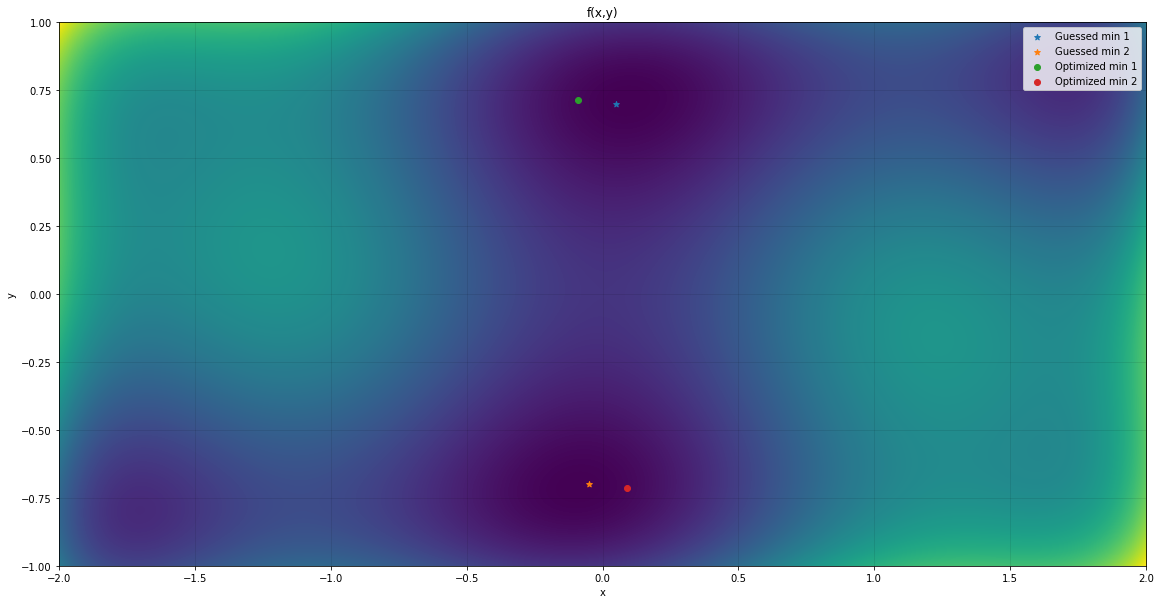


The function values in these points are: 
f(A)= -1.031628453489825 
f(B)= -1.0316284534898104
If the initial guess is (0,0), the optimization method found a minimum in: [0. 0.]


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#3D plot of the two variable function
def func(arr):
    x,y= arr[0],arr[1]
    return (4-2.1*(x**2)+(x**4)/3)*x**2+x*y+(4*(y**2)-4)*y**2

x1= np.linspace(-2,2,1000)
y1= np.linspace(-1,1,1000)
x, y= np.meshgrid(x1,y1)
fig, ax1 = plt.subplots(figsize=(20, 10))
plot = ax1.imshow(func([x, y]), extent=(-2,2)+(-1,1))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('f(x,y)')
ax1.grid(color='black', alpha=0.1)

guesss1=(0.05,0.7)
guesss2=(-0.05,-0.7)
true1 = minimize(func, x0=guesss1, bounds=[(-2,2),(-1,1)])
true2 = minimize(func, x0=guesss2, bounds=[(-2,2),(-1,1)])
print("The global minima of the functions are two, as it can be seen in the plot. Their values are: \nA=",true1.x,"\nB=",true2.x)
plt.scatter(guesss1[0],guesss1[1], marker="*", label="Guessed min 1")
plt.scatter(guesss2[0],guesss2[1], marker="*", label="Guessed min 2")
plt.scatter(true1.x[0],true1.x[1], label="Optimized min 1")
plt.scatter(true2.x[0],true2.x[1], label="Optimized min 2")
ax1.legend(loc="best")
plt.show()
print("\nThe function values in these points are: \nf(A)=",func(true1.x),"\nf(B)=",func(true2.x))
guess0=(0,0)
true0 = minimize(func, x0=guess0, bounds=[(-2,2),(-1,1)])
print("If the initial guess is (0,0), the optimization method found a minimum in:",true0.x)

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.


,MONTHS,MAX °C,MIN °C
0,Jan,17,-62
1,Feb,19,-59
2,Mar,21,-56
3,Apr,28,-46
4,May,33,-32
5,Jun,38,-18
6,Jul,37,-9
7,Aug,37,-13
8,Sept,31,-25
9,Oct,23,-46


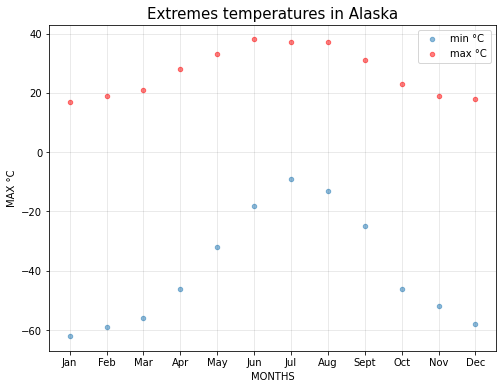

In [34]:
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]
df=pd.DataFrame(index = [np.arange(12)])
df["MONTHS"]=months
temp1=[17,19,21,28,33,38,37,37,31,23,19,18]
df["MAX °C"]=temp1
temp2=[-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58]
df["MIN °C"]=temp2
display(df)

fig, ax = plt.subplots(figsize=(8, 6))
df.plot.scatter(x="MONTHS",y="MIN °C", alpha=0.5, ax=ax, label="min °C")
df.plot.scatter(x="MONTHS",y="MAX °C", alpha=0.5, ax=ax, color="r", label="max °C")
ax.set_ylabel=("Temperatures (°C)")
ax.set_title("Extremes temperatures in Alaska", fontsize=15)
ax.grid(color='black', alpha=.1)
ax.legend(loc="best")


* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?


Considering y=A*cos(x*w+phi)+k as the fitting function, the following optimal parameters are found:

for MAX temperatures:
A = 10.581699534203425 +/- 0.4100782337689219
w = 0.5922742387475014 +/- 0.021182860283416552
phi = -3.3894520886403283 +/- 0.1260220086032762
k = 27.949635365581802 +/- 0.4282464928724393

for MIN temperatures:
A = 25.14962148661869 +/- 1.3145625852090022
w = 0.6013203181509599 +/- 0.023037436800856948
phi = -3.6878954061380065 +/- 0.14305216280595706
k = -36.71258409768172 +/- 1.1910622323777316

The two fit are in reasonable agree with the data. However, knowing the errors on the temperature mesurements could help us to better understand the goodness of the fit.


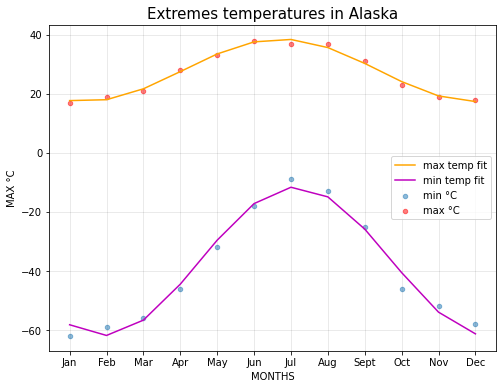

In [53]:
def fit(x, A, w, phi, k):
    return A*np.cos(x*w+phi)+k

guess1=[10,0.6,-3,28]
popt1, pcov1 = optimize.curve_fit(fit, np.arange(12), temp1, p0=guess1, full_output=False)
errors1 = np.sqrt(np.diag(pcov1))
print("Considering y=A*cos(x*w+phi)+k as the fitting function, the following optimal parameters are found:\n")
print("for MAX temperatures:")
param=["A","w","phi","k"]
for name, value, error in zip(param,popt1,errors1):
    print(name,"=",value,"+/-",error)
guess2=[25,0.6,-4,-37]
popt2, pcov2 = optimize.curve_fit(fit, np.arange(12), temp2, p0=guess2, full_output=False)
errors2 = np.sqrt(np.diag(pcov2))
print("\nfor MIN temperatures:")
for name, value, error in zip(param,popt2,errors2):
    print(name,"=",value,"+/-",error)

fig, ax = plt.subplots(figsize=(8, 6))
df.plot.scatter(x="MONTHS",y="MIN °C", alpha=0.5, ax=ax, label="min °C")
df.plot.scatter(x="MONTHS",y="MAX °C", alpha=0.5, ax=ax, color="r", label="max °C")
ax.set_ylabel=("Temperatures (°C)")
ax.set_title("Extremes temperatures in Alaska", fontsize=15)
ax.grid(color='black', alpha=.1)
ax.plot(months, fit(np.arange(12), popt1[0], popt1[1], popt1[2], popt1[3]), color='orange', label='max temp fit')
ax.plot(months, fit(np.arange(12), popt2[0], popt2[1], popt2[2], popt2[3]), color='m', label='min temp fit')
ax.legend(loc="best")

print("\nThe two fit are in reasonable agree with the data. However, knowing the errors on the temperature mesurements could help us to better understand the goodness of the fit.")

* Is the time offset for min and max temperatures the same within the fit accuracy?

In [56]:
diff_omega=abs(popt1[1]-popt2[1])
diff_phi=abs(popt1[2]-popt2[2])
print("The offset for w is the same:", diff_omega < np.min([errors1[1], errors2[1]]))
print("The offset for phi is the same:", diff_phi < np.min([errors1[2], errors2[2]]))

The offset for w is the same: True
The offset for phi is the same: False


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".



In [4]:
import pickle
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy import optimize
import pandas as pd
import numpy as np

d="/Users/Elena/Downloads/residuals_261.pkl"
with open(d, 'rb') as f:
    data = pickle.load(f).item()
df = pd.DataFrame(data['residuals'], columns=['residuals'])
df['distances'] = data['distances']  
#I clean the dataset by applying a mask
df = df[abs(df['residuals']) < 1.5]
display(df)

,residuals,distances
0,1.100000,16.0
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
11,-0.130000,9.3
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)

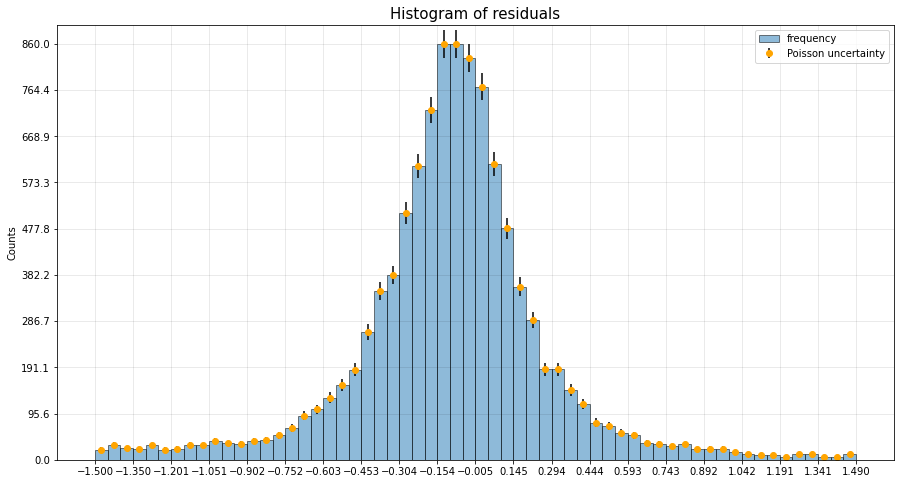

In [19]:
fig, (histo_plot) = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
histo, bins, g=histo_plot.hist(x=df["residuals"], bins = 60, alpha=0.5, ec="black", label="frequency")
bincenters = 0.5*(bins[1:]+bins[:-1])
histo_plot.errorbar(bincenters, histo, yerr = histo**0.5, fmt="o", color="orange",ecolor="black",ls="None",label="Poisson uncertainty")
maxfreq=histo.max()
histo_plot.set_ylim(0,int(maxfreq + np.sqrt(maxfreq)+10))
histo_plot.set_title('Histogram of residuals', fontsize=15)
histo_plot.set_ylabel('Counts')
histo_plot.grid(color='black', alpha=.1)
histo_plot.set_xticks(bins[::3])
histo_plot.set_yticks(np.linspace(0,maxfreq,10))
histo_plot.legend(loc="best")

- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals

Supposing that the histogram is fitted by a gaussian, the parameters found are:

σ = 0.20709501347969134 +/- 0.00406806684747079
μ = -0.08582471379557542 +/- 0.0037224159212888557
A = 412.3150200368773 +/- 8.075282524796972
cost = 33.352000274546505 +/- 4.450318998849763


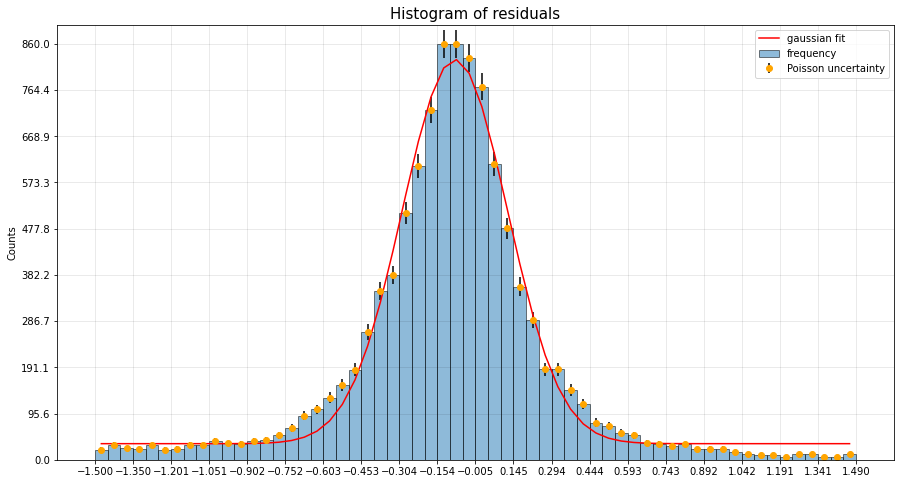

In [22]:
def gauss(x, sigma, mu, c,b):
    t=-0.5*((x-mu)/sigma)**2
    return c*np.exp(t)/(sigma*(2*math.pi)**0.5)+b

guess=[0.2,-0.1,496,21]
popt, pcov = optimize.curve_fit(gauss, xdata=bincenters, ydata=histo, p0=guess)
errors = np.sqrt(np.diag(pcov))
print("Supposing that the histogram is fitted by a gaussian, the parameters found are:\n")
parm=["\u03C3","\u03BC","A","cost"]
for name, value, error in zip(parm,popt,errors):
    print(name,"=",value,"+/-",error)

#replot of the histo with the fit
fig, (histo_plot) = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
histo, bins, g=histo_plot.hist(x=df["residuals"], bins = 60, alpha=0.5, ec="black", label="frequency")
bincenters = 0.5*(bins[1:]+bins[:-1])
histo_plot.errorbar(bincenters, histo, yerr = histo**0.5, fmt="o", color="orange",ecolor="black",ls="None",label="Poisson uncertainty")
maxfreq=histo.max()
histo_plot.set_ylim(0,int(maxfreq + np.sqrt(maxfreq)+10))
histo_plot.set_title('Histogram of residuals', fontsize=15)
histo_plot.set_ylabel('Counts')
histo_plot.grid(color='black', alpha=.1)
histo_plot.set_xticks(bins[::3])
histo_plot.set_yticks(np.linspace(0,maxfreq,10))
histo_plot.plot(bincenters, gauss(bincenters, popt[0], popt[1], popt[2],popt[3]), color='r', label='gaussian fit')
histo_plot.legend(loc="best")
plt.show()

- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [24]:
dof=len(bins)-4
print("Number of degrees of freedom:",dof)
chi2 = np.sum(((histo - gauss(bincenters, popt[0], popt[1], popt[2],popt[3]))**2) / np.abs(histo) )
#chi2 = np.sum(((histo - gauss(bincenters, 0.21, -0.086, 496,20.67))**2) / np.abs(histo) )
print("The Chi^2 is:", chi2)
pvalue = 1. - stats.chi2.cdf(chi2, dof)
print("The p-value found is:", pvalue)
print("The value found is not satisfactory: the gaussian, even if shifted, function doesn't represent well the plotted datas.")

Number of degrees of freedom: 57
The Chi^2 is: 943.76638517258
The p-value found is: 0.0
The value found is not satisfactory: the gaussian, even if shifted, function doesn't represent well the plotted datas.


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


,time (year),temperature (°C)
0,1995.00274,0.944444
1,1995.00548,-1.611110
2,1995.00821,-3.555560
3,1995.01095,-9.833330
4,1995.01369,-10.222200
...,...,...
6674,2013.27379,7.333330
6675,2013.27652,10.000000
6676,2013.27926,10.555600
6677,2013.28200,8.944440


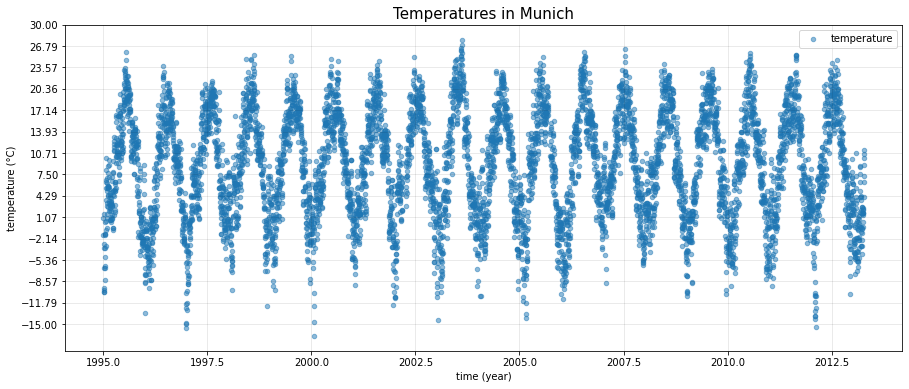

In [1]:
import pandas as pd
import math
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import stats
data=pd.read_csv("munich_temperatures_average_with_bad_data.txt", delimiter=' ', names=["time (year)","temperature (°C)"])
df_er=data[data['temperature (°C)'] < 50]
df_full=df_er[df_er['temperature (°C)'] > -20]
df=df_full[4717:6176]
display(df_full)

fig, ax = plt.subplots(figsize=(15, 6))
df_full.plot.scatter(x="time (year)",y="temperature (°C)", alpha=0.5, ax=ax, label="temperature")
ax.set_title("Temperatures in Munich", fontsize=15)
ax.grid(color='black', alpha=.1)
ax.set_yticks(np.linspace(-15,30,15))
ax.legend(loc="best")

Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?



The parameters found are:
a = -9.979013184285309 +/- 0.13213697457864598
b = -0.2367066099472826 +/- 0.013258179284148476
c = 9.254446193345313 +/- 0.09349136296716636

The overall avarage temperature in Munich is 9.25 °C.
The avarage temperature for summer is: 17.99 °C.
The model returns an avarage temperature of: 18.0 °C.
141.88324839151346
The avarage temperature for winter is: 0.24 °C.
The model returns an avarage temperature of: 0.27 °C.

The parameter b it's a time and represent the phase of the fitting function. Its physical sense it's to put correctly the min temperatures in winter time of the year and the max in summer.


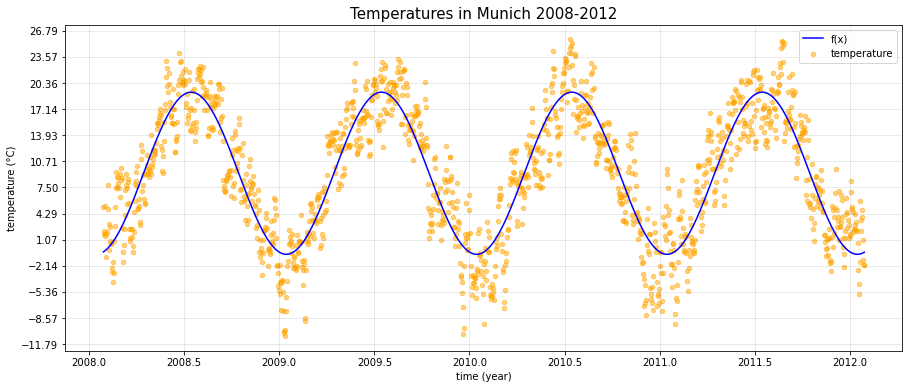

In [15]:
def cos(t,a,b,c):
    arg=2*math.pi*t+b
    return a*np.cos(arg)+c

guessed=[10,0,9.3]
opt, cov = optimize.curve_fit(cos, xdata=df["time (year)"], ydata=df["temperature (°C)"], p0=guessed)
err = np.sqrt(np.diag(cov))
print("The parameters found are:")
p=["a","b","c"]
for name, value, error in zip(p,opt,err):
    print(name,"=",value,"+/-",error)
    
fig, ax = plt.subplots(figsize=(15, 6))
df.plot.scatter(x="time (year)",y="temperature (°C)", alpha=0.5, ax=ax, color="orange", label="temperature")
ax.set_title("Temperatures in Munich 2008-2012", fontsize=15)
ax.grid(color='black', alpha=.1)
ax.set_yticks(np.linspace(-15,30,15))
ax.plot(df["time (year)"], cos(df["time (year)"], opt[0], opt[1], opt[2]), color='blue', label='f(x)')
ax.legend(loc="best")

#average temperatures
print("\nThe overall avarage temperature in Munich is",round(df["temperature (°C)"].describe()['mean'],2),"°C.")
#I estimate that summer start the 15th of June (0.4482) and end the 15th of September (0.6966)
tot=0
summer_int=0
for i in range(2008,2012):
    df_hot=df[(df['time (year)'] > i+0.4482)&(df['time (year)'] < i+0.6993)]
    tot=tot+df_hot["temperature (°C)"].mean()
    for t in df_hot["time (year)"]:
        T=cos(t, opt[0],opt[1],opt[2])
        summer_int=summer_int+T
print("The avarage temperature for summer is:", round(tot/4,2),"°C.")
print("The model returns an avarage temperature of:",round(summer_int/(4*len(df_hot["time (year)"])),2),"°C.")
#I estimate that winter start the 15th of December (0.9568) and end the 15th of March (0.1998)
tot=0
winter_int=0
for i in range(2008,2011):
    df_cold=df[(df['time (year)'] > i+0.9568)&(df['time (year)'] < i+1+0.2025)]
    tot=tot+df_cold["temperature (°C)"].mean()
    for t in df_cold["time (year)"]:
        T=cos(t, opt[0],opt[1],opt[2])
        winter_int=winter_int+T
print(winter_int)
df_c=df[(df['time (year)'] > 2011.9568)|(df['time (year)'] < 2008.2025)]
tot=tot+df_c["temperature (°C)"].mean()
for t in df_c["time (year)"]:
    T=cos(t, opt[0],opt[1],opt[2])
    winter_int=winter_int+T
print("The avarage temperature for winter is:", round(tot/4,2),"°C.")
print("The model returns an avarage temperature of:",round(winter_int/(4*(len(df_cold["time (year)"])+len(df_c["time (year)"]))),2),"°C.")
print("\nThe parameter b it's a time and represent the phase of the fitting function. Its physical sense it's to put correctly the min temperatures in winter time of the year and the max in summer.")

- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

The parameters found are:
a = -9.977577469769152 +/- 0.13290779150701862
b = 1.0003401865846775 +/- 0.001875294744998085
c = -4.533034516052821 +/- 23.68388841743047
d = 9.257751097384576 +/- 0.09527860598728385

The RSS for f(x) and g(x) are, respectively: 18567.764665501578 and 18567.374018709677

Test f(x) vs g(x):
CL: nan , additional parameter necessary: NO
The two functions plotted are equivalent, the F-Test is a confirmation that the additional parameter is not necessary to fit the data.


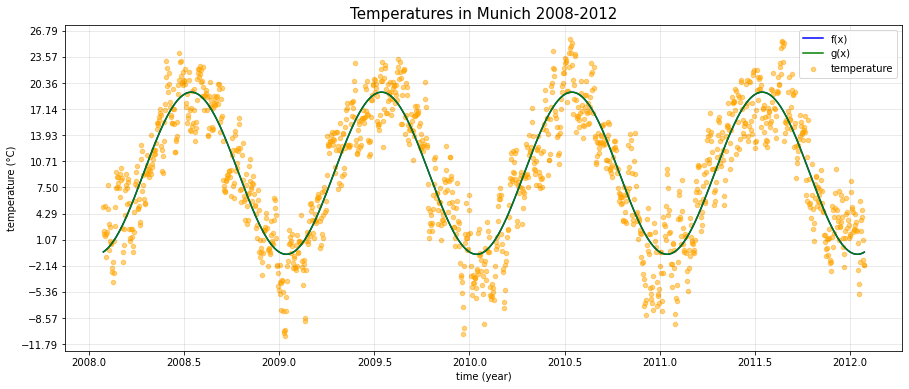

In [120]:
def cos1(t,a,b,c,d):
    arg=2*math.pi*t*b+c
    return a*np.cos(arg)+d

guessed1=[10,1,0,9.3]
opt1, cov1 = optimize.curve_fit(cos1, xdata=df["time (year)"], ydata=df["temperature (°C)"], p0=guessed1)
err1 = np.sqrt(np.diag(cov1))
print("The parameters found are:")
namess=["a","b","c","d"]
for name, value, error in zip(namess,opt1,err1):
    print(name,"=",value,"+/-",error)
    
fig, ax1 = plt.subplots(figsize=(15, 6))
df.plot.scatter(x="time (year)",y="temperature (°C)", alpha=0.5, ax=ax1, color="orange", label="temperature")
ax1.set_title("Temperatures in Munich 2008-2012", fontsize=15)
ax1.grid(color='black', alpha=.1)
ax1.set_yticks(np.linspace(-15,30,15))
ax1.plot(df["time (year)"], cos(df["time (year)"], opt[0], opt[1], opt[2]), color='blue', label='f(x)')
ax1.plot(df["time (year)"], cos1(df["time (year)"], opt1[0], opt1[1], opt1[2], opt1[3]), color='green', label='g(x)')
ax1.legend(loc="best")

#RSS
ssr = np.sum((df["temperature (°C)"] - cos(df["time (year)"],opt[0], opt[1], opt[2]))**2)
ssr1 = np.sum((df["temperature (°C)"] - cos1(df["time (year)"],opt1[0], opt1[1], opt1[2], opt1[3]))**2)
print("\nThe RSS for f(x) and g(x) are, respectively:", ssr, "and", ssr1)

#F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL
#degree of freedom for the two functions:
dof=len(df["time (year)"])-3
dof1=len(df["time (year)"])-4
print("\nTest f(x) vs g(x):")
cl_1_vs_2 = Ftest(ssr, ssr1, dof, dof1, len(df["time (year)"]), verbose=True)
print("The two functions plotted are equivalent, the F-Test is a confirmation that the additional parameter is not necessary to fit the data.")